In [348]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup



In [26]:
url = "https://chordify.net/api/v2/songs/youtube:o26SlmROH5Q/chords?vocabulary=extended_inversions"
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req)
data = json.loads(webpage.read())


In [158]:
tonalidad = data['derivedKey']
chords = data['chords']

In [159]:

chords = chords.split()[1:-2]

In [160]:
chords

['1;A:maj;0.32;0.82',
 '2;A:maj;0.82;1.32',
 '3;A:maj;1.32;1.82',
 '4;A:maj;1.82;2.3',
 '1;G:maj;2.3;2.8',
 '2;G:maj;2.8;3.3',
 '3;G:maj;3.3;3.78',
 '4;G:maj;3.78;4.28',
 '1;B:min;4.28;4.76',
 '2;B:min;4.76;5.26',
 '3;B:min;5.26;5.74',
 '4;B:min;5.74;6.24',
 '1;B:min;6.24;6.74',
 '2;B:min;6.74;7.24',
 '3;B:min;7.24;7.72',
 '4;B:min;7.72;8.22',
 '1;A:maj;8.22;8.7',
 '2;A:maj;8.7;9.2',
 '3;A:maj;9.2;9.7',
 '4;A:maj;9.7;10.18',
 '1;G:maj;10.18;10.68',
 '2;G:maj;10.68;11.16',
 '3;G:maj;11.16;11.66',
 '4;G:maj;11.66;12.16',
 '1;D:maj;12.16;12.64',
 '2;D:maj;12.64;13.12',
 '3;D:maj;13.12;13.62',
 '4;D:maj;13.62;14.12',
 '1;D:maj;14.12;14.6',
 '2;D:maj;14.6;15.1',
 '3;D:maj;15.1;15.6',
 '4;D:maj;15.6;16.08',
 '1;A:maj;16.08;16.58',
 '2;A:maj;16.58;17.06',
 '3;A:maj;17.06;17.56',
 '4;A:maj;17.56;18.04',
 '1;G:maj;18.04;18.54',
 '2;G:maj;18.54;19.04',
 '3;G:maj;19.04;19.52',
 '4;G:maj;19.52;20.02',
 '1;B:min;20.02;20.5',
 '2;B:min;20.5;21.0',
 '3;B:min;21.0;21.5',
 '4;B:min;21.5;21.98',
 '1;B:m

In [202]:
def to_arr(chords):
    ch_arr = []
    for i in range(len(chords)):
        x = chords[i][2:7]
        ch_arr.append(x)
    return ch_arr

In [223]:
ch_arr = to_arr(chords)

In [229]:
for i in ch_arr:
    if i[0] == 'N':
        print(i)
        ch_arr.remove(i)


In [482]:
grados = ['I','II','III','IV','V','VIb','VI','VII']
acordes = np.array(['D','E','F','G','A','A#','B','C'])

In [484]:
acordes.roll

AttributeError: 'numpy.ndarray' object has no attribute 'roll'

In [237]:
lista = []
for i in ch_arr:
    acorde = i.split(':')[0]
    x = i.replace(acorde, grados[acordes.index(acorde)])
    lista.append(x)


In [298]:
lista = np.array(lista)

In [436]:
lista2 = lista
lista2[0]

'V:maj'

In [317]:
new_list = [[i, v] for i, v in enumerate(lista)]
dicto2 = {'beat':[],'chord':[]}
for i in new_list:
    print(i)
    dicto2['beat'].append(i[0])
    dicto2['chord'].append(i[1])

data = pd.DataFrame(dicto2)
#new_l = np.array(new_list)

In [340]:
data = pd.DataFrame(dicto2)

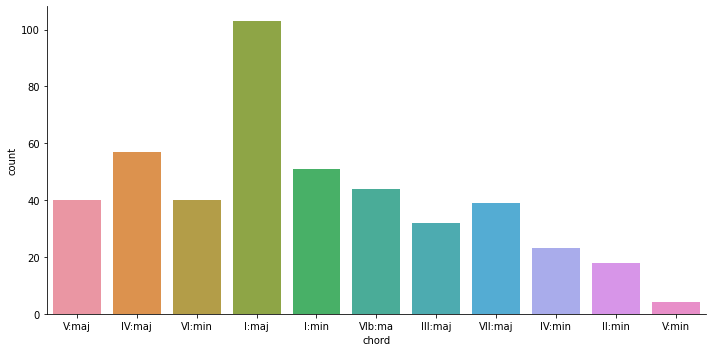

In [359]:
sns.catplot(x='chord', kind='count', data=data, height=5, aspect=2)

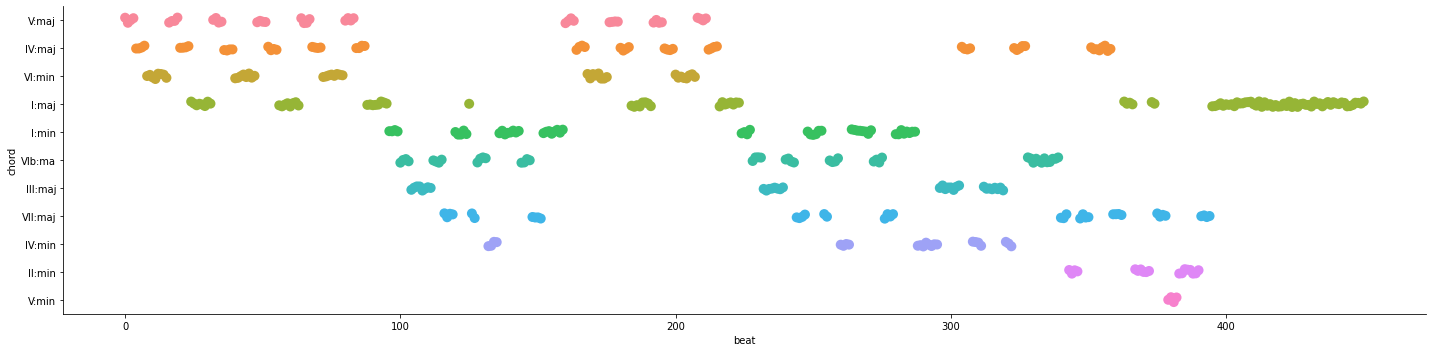

In [429]:

p = sns.catplot(x="beat", y="chord", data=data, height=5, aspect=4, s=10)
#xtics = np.linspace(0, len(data), int(len(data)//16), retstep=8, dtype='int64')
#xtics = xtics[0]
#plt.xticks(xtics)
#plt.grid()

In [ ]:
enlaces = []
c = 0
while c < len(lista2)-1:
    #enlace = []
    if lista2[c] != lista2[c+1]:
        enlaces.append(lista2[c] +'/'+ lista2[c+1])
        c += 1
    else:
        c += 1
enlaces

In [ ]:
enlaces_num = [[i, v] for i, v in enumerate(enlaces)]
enlaces_dict = {'beat':[],'chord':[]}
for i in enlaces_num:
    print(i)
    enlaces_dict['beat'].append(i[0])
    enlaces_dict['chord'].append(i[1])

enlaces_df = pd.DataFrame(enlaces_dict);

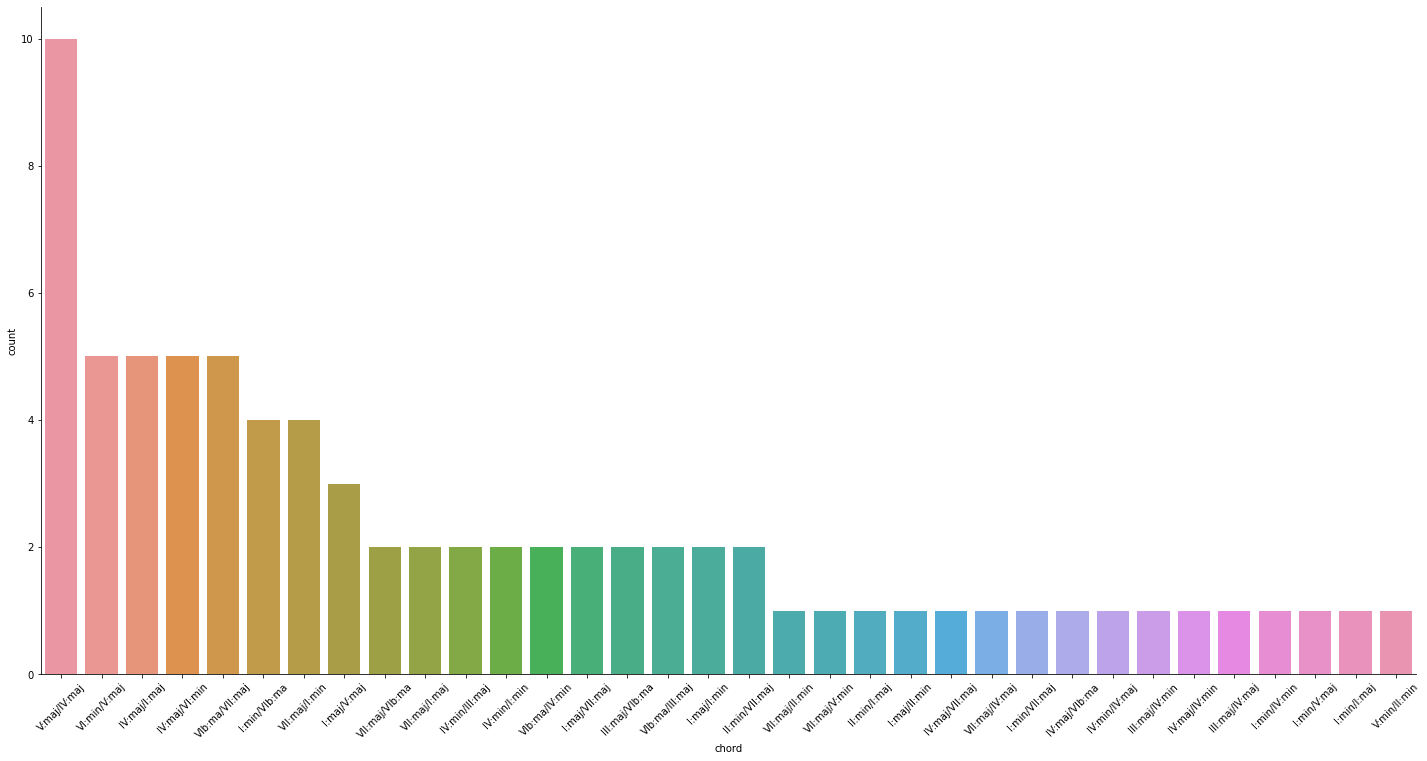

In [481]:
sns.catplot(x='chord', kind='count', data=enlaces_df, height=10, aspect=2, order=enlaces_df['chord'].value_counts().index)
plt.xticks(rotation = 45);

In [468]:
unique, counts = np.unique(enlaces, return_counts=True)
#dicto = dict(zip(list(unique), list(counts)))
#dicto
unique, counts

(array(['I:maj/I:min', 'I:maj/II:min', 'I:maj/V:maj', 'I:maj/VII:maj',
        'I:min/I:maj', 'I:min/IV:min', 'I:min/V:maj', 'I:min/VII:maj',
        'I:min/VIb:ma', 'II:min/I:maj', 'II:min/VII:maj', 'III:maj/IV:maj',
        'III:maj/IV:min', 'III:maj/VIb:ma', 'IV:maj/I:maj',
        'IV:maj/IV:min', 'IV:maj/VI:min', 'IV:maj/VII:maj',
        'IV:maj/VIb:ma', 'IV:min/I:min', 'IV:min/III:maj', 'IV:min/IV:maj',
        'V:maj/IV:maj', 'V:min/II:min', 'VI:min/V:maj', 'VII:maj/I:maj',
        'VII:maj/I:min', 'VII:maj/II:min', 'VII:maj/IV:maj',
        'VII:maj/V:min', 'VII:maj/VIb:ma', 'VIb:ma/III:maj',
        'VIb:ma/IV:min', 'VIb:ma/VII:maj'], dtype='<U14'),
 array([ 2,  1,  3,  2,  1,  1,  1,  1,  4,  1,  2,  1,  1,  2,  5,  1,  5,
         1,  1,  2,  2,  1, 10,  1,  5,  2,  4,  1,  1,  1,  2,  2,  2,  5],
       dtype=int64))

In [471]:
data2 = {'grados':list(unique), 'conteo':list(counts)}
data2 = pd.DataFrame(data2)
data2

,grados,conteo
0,I:maj/I:min,2
1,I:maj/II:min,1
2,I:maj/V:maj,3
3,I:maj/VII:maj,2
4,I:min/I:maj,1
5,I:min/IV:min,1
6,I:min/V:maj,1
7,I:min/VII:maj,1
8,I:min/VIb:ma,4
9,II:min/I:maj,1


In [447]:
new_list2 = [[i, v] for i, v in enumerate(enlaces)]
dicto3 = {'ind':[],'enlace':[]}
for i in new_list2:
    print(i)
    dicto3['ind'].append(i[0])
    dicto3['enlace'].append(i[1])

data2 = pd.DataFrame(dicto3)

[0, ['V:maj', 'IV:maj']]
[1, ['IV:maj', 'VI:min']]
[2, ['VI:min', 'V:maj']]
[3, ['V:maj', 'IV:maj']]
[4, ['IV:maj', 'I:maj']]
[5, ['I:maj', 'V:maj']]
[6, ['V:maj', 'IV:maj']]
[7, ['IV:maj', 'VI:min']]
[8, ['VI:min', 'V:maj']]
[9, ['V:maj', 'IV:maj']]
[10, ['IV:maj', 'I:maj']]
[11, ['I:maj', 'V:maj']]
[12, ['V:maj', 'IV:maj']]
[13, ['IV:maj', 'VI:min']]
[14, ['VI:min', 'V:maj']]
[15, ['V:maj', 'IV:maj']]
[16, ['IV:maj', 'I:maj']]
[17, ['I:maj', 'I:min']]
[18, ['I:min', 'VIb:ma']]
[19, ['VIb:ma', 'III:maj']]
[20, ['III:maj', 'VIb:ma']]
[21, ['VIb:ma', 'VII:maj']]
[22, ['VII:maj', 'I:min']]
[23, ['I:min', 'I:maj']]
[24, ['I:maj', 'VII:maj']]
[25, ['VII:maj', 'VIb:ma']]
[26, ['VIb:ma', 'IV:min']]
[27, ['IV:min', 'I:min']]
[28, ['I:min', 'VIb:ma']]
[29, ['VIb:ma', 'VII:maj']]
[30, ['VII:maj', 'I:min']]
[31, ['I:min', 'V:maj']]
[32, ['V:maj', 'IV:maj']]
[33, ['IV:maj', 'VI:min']]
[34, ['VI:min', 'V:maj']]
[35, ['V:maj', 'IV:maj']]
[36, ['IV:maj', 'I:maj']]
[37, ['I:maj', 'V:maj']]
[38, ['V:m

In [448]:
sns.catplot(x=data2['enlace'], kind='count', data=data2, height=5, aspect=2)

TypeError: unhashable type: 'list'

In [252]:
np.unique(lista)

array(['I:maj', 'I:min', 'II:min', 'III:maj', 'IV:maj', 'IV:min', 'V:maj',
       'V:min', 'VI:min', 'VII:maj', 'VIb:ma'], dtype='<U7')

In [273]:
unique, counts = np.unique(lista, return_counts=True)
dicto = dict(zip(list(unique), list(counts)))
dicto

{'I:maj': 103,
 'I:min': 51,
 'II:min': 18,
 'III:maj': 32,
 'IV:maj': 57,
 'IV:min': 23,
 'V:maj': 40,
 'V:min': 4,
 'VI:min': 40,
 'VII:maj': 39,
 'VIb:ma': 44}

In [289]:
data = {'grados':list(unique), 'conteo':list(counts)}

In [291]:
df_chord_count = pd.DataFrame.from_dict(data)

<AxesSubplot:xlabel='grados'>

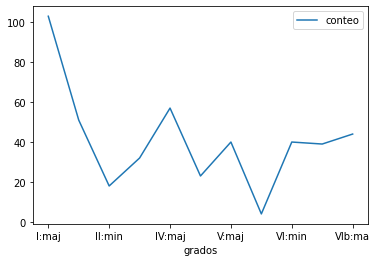

In [294]:
df_chord_count.plot(x = 'grados')

In [286]:
dicto2

,cantidad
I:maj,NaN
I:min,NaN
II:min,NaN
III:maj,NaN
IV:maj,NaN
IV:min,NaN
V:maj,NaN
V:min,NaN
VI:min,NaN
VII:maj,NaN


In [245]:
def grades_to_sheet(lista):
    sheet = []
    t = 0
    c = 0
    compas = []
    for i in range(len(lista)):
        x = lista[i]
        t += 1
        compas.append(x)
        if t ==4:
            t = 0
            c += 1
            sheet.append(compas)
            compas = []
    df = pd.DataFrame(data=sheet, columns={'1','2','3','4'})
    return df

In [246]:
df2 = grades_to_sheet(lista)

In [247]:
df2

,1,4,2,3
0,V:maj,V:maj,V:maj,V:maj
1,IV:maj,IV:maj,IV:maj,IV:maj
2,VI:min,VI:min,VI:min,VI:min
3,VI:min,VI:min,VI:min,VI:min
4,V:maj,V:maj,V:maj,V:maj
...,...,...,...,...
107,I:maj,I:maj,I:maj,I:maj
108,I:maj,I:maj,I:maj,I:maj
109,I:maj,I:maj,I:maj,I:maj
110,I:maj,I:maj,I:maj,I:maj


In [104]:
def to_sheet(chords):
    sheet = []
    t = 0
    c = 0
    compas = []
    for i in range(len(chords)):
        x = chords[i][2:7]
        t += 1
        compas.append(x)
        if t == 4:
            t = 0
            c += 1
            sheet.append(compas)
            compas = []
    df = pd.DataFrame(data=sheet, columns={'1','2','3','4'})
    return df


In [ ]:
sheet = to_sheet(chords)

In [109]:
df = pd.DataFrame(data=sheet, columns={'1','2','3','4'})

In [253]:
df.describe(include='all')

,1,4,2,3
count,115,115,115,115
unique,13,13,13,14
top,D:maj,D:maj,D:maj,D:maj
freq,25,26,26,26


In [276]:
df['4'].unique()

array(['A:maj', 'G:maj', 'B:min', 'D:maj', 'D:min', 'A#:ma', 'F:maj',
       'C:maj', 'G:min', 'N;170', 'N;172', 'E:min', 'A:min'], dtype=object)

In [144]:
fundamental = sheet[0][0].split(':')[0]
calidad = sheet[0][0].split(':')[1]

In [145]:
fundamental, calidad

('A', 'maj')

In [148]:
def to_grades(df):
    grades = []
    for i in df.values:
        fundamental = df[0][0].split(':')[0]
        calidad = df[0][0].split(':')[1]
        
    

['A:maj' 'A:maj' 'A:maj' 'A:maj']
['G:maj' 'G:maj' 'G:maj' 'G:maj']
['B:min' 'B:min' 'B:min' 'B:min']
['B:min' 'B:min' 'B:min' 'B:min']
['A:maj' 'A:maj' 'A:maj' 'A:maj']
['G:maj' 'G:maj' 'G:maj' 'G:maj']
['D:maj' 'D:maj' 'D:maj' 'D:maj']
['D:maj' 'D:maj' 'D:maj' 'D:maj']
['A:maj' 'A:maj' 'A:maj' 'A:maj']
['G:maj' 'G:maj' 'G:maj' 'G:maj']
['B:min' 'B:min' 'B:min' 'B:min']
['B:min' 'B:min' 'B:min' 'B:min']
['A:maj' 'A:maj' 'A:maj' 'A:maj']
['G:maj' 'G:maj' 'G:maj' 'G:maj']
['D:maj' 'D:maj' 'D:maj' 'D:maj']
['D:maj' 'D:maj' 'D:maj' 'D:maj']
['A:maj' 'A:maj' 'A:maj' 'A:maj']
['G:maj' 'G:maj' 'G:maj' 'G:maj']
['B:min' 'B:min' 'B:min' 'B:min']
['B:min' 'B:min' 'B:min' 'B:min']
['A:maj' 'A:maj' 'A:maj' 'A:maj']
['G:maj' 'G:maj' 'G:maj' 'G:maj']
['D:maj' 'D:maj' 'D:maj' 'D:maj']
['D:maj' 'D:maj' 'D:maj' 'D:maj']
['D:min' 'D:min' 'D:min' 'D:min']
['A#:ma' 'A#:ma' 'A#:ma' 'A#:ma']
['F:maj' 'F:maj' 'F:maj' 'F:maj']
['F:maj' 'F:maj' 'F:maj' 'F:maj']
['A#:ma' 'A#:ma' 'A#:ma' 'A#:ma']
['C:maj' 'C:ma